In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 10)
import seaborn as sns
sns.set()

In [2]:
# Website for csv creation = https://www.barchart.com/ca/stocks/indices/tsx/tsx60?viewName=fundamental

In [3]:
def df_build():
    
    df = pd.read_csv('tsx60_data.csv')
    df = df.dropna()
    df = df.reset_index(drop=True)
    
    return df

In [4]:
def market_cap_ranking():
   
    df_mcr = df_build()
    df_mcr = df_mcr[['Symbol', 'Name', 'Market Cap']]
    
    mc_lst = []
    for mc in df_mcr['Market Cap']:
        mc = mc.replace(',','')
        mc_lst.append(int(mc))
    
    df_mcr['Market Cap'] = mc_lst   
    df_mcr = df_mcr.sort_values(by='Market Cap', ascending=False)
    
    mc_score_lst = []
    score = 1
    while score != len(df_mcr['Market Cap']) + 1:
        mc_score_lst.append(score)
        score += 1
    
    df_mcr['Market Cap Score'] = mc_score_lst
    
    return df_mcr

In [5]:
def pe_ranking():
    
    df_pe = df_build()
    df_pe = df_pe[['Symbol', 'Name', 'P/E ttm']]
    
    pe_lst = []
    for pe in df_pe['P/E ttm']:
        pe = pe.replace(',','')
        pe_lst.append(float(pe))
        
    df_pe['P/E ttm'] = pe_lst
    df_pe = df_pe.sort_values(by='P/E ttm', ascending=True)
    
    pe_score_lst = []
    score = 1
    while score != len(df_pe['P/E ttm']) + 1:
        pe_score_lst.append(score)
        score += 1
        
    df_pe['P/E Score'] = pe_score_lst
    
    return df_pe

In [6]:
def div_ranking():
    
    df_div = df_build()
    df_div = df_div[['Symbol', 'Name', 'Div Yield']]
    
    div_lst = []
    for div in df_div['Div Yield']:
        div = div.replace('%','')
        div_lst.append(div)
        
    df_div['Div Yield'] = div_lst
    df_div = df_div.sort_values(by='Div Yield', ascending=False)
    
    div_score_lst = []
    score = 1
    while score != len(df_div['Div Yield']) + 1:
        div_score_lst.append(score)
        score += 1
        
    df_div['Dividend Score'] = div_score_lst
    
    return df_div

In [7]:
def results():
   
    df_results = df_build()
    
    df_mc = market_cap_ranking()
    df_mc = df_mc[['Symbol', 'Market Cap Score']]
    
    df_pe = pe_ranking()
    df_pe = df_pe[['Symbol', 'P/E Score']]
    
    df_div = div_ranking()
    df_div = df_div[['Symbol', 'Dividend Score']]
    
    df_results = df_results.join(df_mc.set_index('Symbol'), on='Symbol')
    df_results = df_results.join(df_pe.set_index('Symbol'), on='Symbol')
    df_results = df_results.join(df_div.set_index('Symbol'), on='Symbol')
    
    df_results['Total Score'] = df_results['Market Cap Score'] + df_results['P/E Score'] + df_results['Dividend Score']
    
    df_results = df_results.sort_values(by='Total Score')
    df_results = df_results.reset_index(drop=True)
    
    return df_results
    print(df_results)

In [8]:
def viz_1():
    viz1 = results()
    viz1 = viz1[['Name', 'Total Score']]
    
    score_lst = []
    for num in viz1['Total Score']:
        num = (num - (max(viz1['Total Score']) + 1))
        num = abs(num)
        score_lst.append(num)
        
    viz1['Total Score'] = score_lst
    
    labels = []
    for name in viz1['Name']:
        labels.append(name)
    scores = []
    for score in viz1['Total Score']:
        scores.append(score)

    plt.figure(figsize=(10, 15))
    plt.barh(labels, scores)
    plt.title('TSX60 Score per Company')
    plt.xlabel('Score')
    plt.show()

    plt.show()

In [9]:
def viz_2():
    viz2 = results()
    viz2 = viz2[['Name', 'Total Score']]
    viz2 = viz2.head(10)
    
    score_lst = []
    for num in viz2['Total Score']:
        num = (num - (max(viz2['Total Score']) + 1))
        num = abs(num)
        score_lst.append(num)
        
    viz2['Total Score'] = score_lst
    
    labels = []
    for name in viz2['Name']:
        labels.append(name)
    scores = []
    for score in viz2['Total Score']:
        scores.append(score)
    
    plt.figure(figsize=(9,6))
    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.pie(scores, labels=labels)
    plt.title('Top 10 Scores')
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

In [10]:
df_build()

market_cap_ranking()

pe_ranking()

div_ranking()

results()


,Symbol,Name,Market Cap,P/E ttm,Div Yield,Market Cap Score,P/E Score,Dividend Score,Total Score
0,BNS.TO,Bank of Nova Scotia,"92,509,807",11.38,4.75%,4,10,8,22
1,CM.TO,Canadian Imperial Bank of Commerce,"50,312,064",9.9,5.10%,11,7,5,23
2,BMO.TO,Bank of Montreal,"62,580,770",10.36,4.21%,7,8,13,28
3,RY.TO,Royal Bank of Canada,"152,946,104",12.16,3.94%,1,12,18,31
4,TD.TO,Toronto-Dominion Bank,"137,058,528",11.98,3.93%,2,11,19,32
5,CNQ.TO,CDN Natural Res,"40,419,528",8.5,4.40%,16,5,11,32
6,MFC.TO,Manulife Fin,"48,544,218",8.68,4.03%,12,6,15,33
7,SU.TO,Suncor Energy Inc,"62,451,274",12.78,4.13%,8,13,14,35
8,TRP.TO,Tc Energy Corp,"62,410,220",14.86,4.47%,9,17,10,36
9,ENB.TO,Enbridge Inc,"98,054,669",20.53,6.09%,3,32,2,37


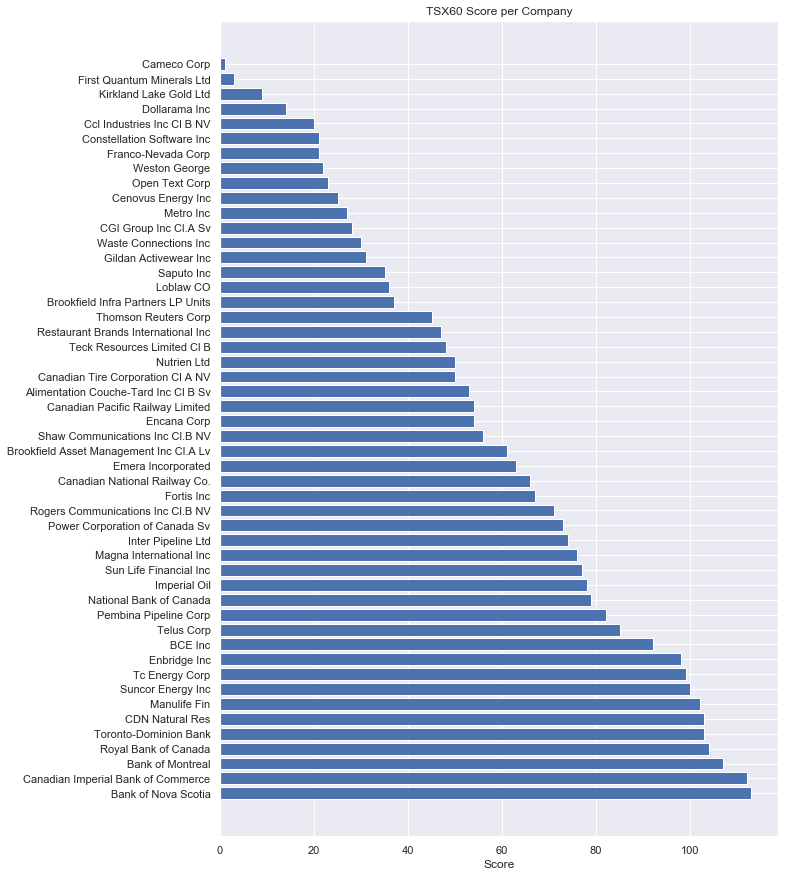

In [11]:
viz_1()

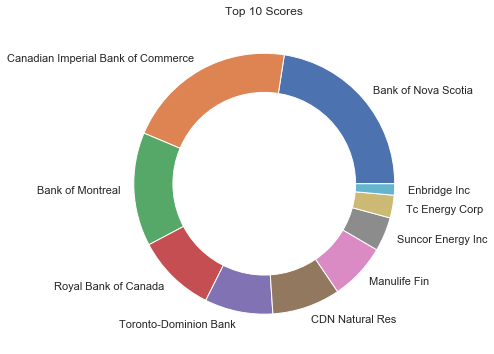

In [12]:
viz_2()